# ZS Data Science Challenge - 2018 (Sateesh Sivakoti)
## Mekktronix Sales

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
import pandas as pd
import numpy as np

In [75]:
train, test, prom_exp = pd.read_csv('yds_train2018.csv'), pd.read_csv('yds_test2018.csv'), pd.read_csv('promotional_expense.csv')

In [76]:
train.describe()

,S_No,Year,Month,Week,Product_ID,Sales
count,79072.00000,79072.000000,79072.000000,79072.000000,79072.000000,7.907200e+04
mean,39536.50000,2014.223935,6.282439,25.614086,2.168151,1.049678e+05
std,22826.26458,0.979109,3.477648,15.160151,1.136387,7.642310e+05
min,1.00000,2013.000000,1.000000,1.000000,1.000000,-2.406069e+06
25%,19768.75000,2013.000000,3.000000,12.000000,1.000000,9.524500e+02
50%,39536.50000,2014.000000,6.000000,25.000000,2.000000,6.400000e+03
75%,59304.25000,2015.000000,9.000000,39.000000,2.000000,2.418520e+04
max,79072.00000,2016.000000,12.000000,53.000000,5.000000,3.487431e+07


The count is equal in all columns. There aren't any missing values in the training data.

In [77]:
train.head()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


In [78]:
print(len(train['Country'].unique()))
train['Country'].unique()

6


array(['Argentina', 'Belgium', 'Columbia', 'Denmark', 'England', 'Finland'], dtype=object)

In [79]:
test.describe()

,S_No,Year,Month,Product_ID,Sales
count,105.000000,105.000000,105.000000,105.000000,0.0
mean,79125.000000,2016.171429,6.028571,2.428571,NaN
std,30.454885,0.508715,3.571945,1.254662,NaN
min,79073.000000,2015.000000,1.000000,1.000000,NaN
25%,79099.000000,2016.000000,3.000000,2.000000,NaN
50%,79125.000000,2016.000000,6.000000,2.000000,NaN
75%,79151.000000,2016.000000,9.000000,4.000000,NaN
max,79177.000000,2017.000000,12.000000,5.000000,NaN


Other than sales all the columns have equal number of entries, which is the full size of the dataset. There are no missing values.

In [80]:
test.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


There are no missing values in the train and test data sets.

In [81]:
table = train.pivot_table(index = ['Year', 'Month', 'Product_ID', 'Country'], values='Sales', aggfunc = np.sum)
table.head(10)

Sales
Year Month Product_ID Country                
2013 1     1          Argentina  3.434602e+07
                      Columbia   3.947356e+06
           2          Argentina  2.751851e+06
                      Belgium    3.148501e+05
                      Columbia   2.885137e+06
                      Denmark    1.018476e+08
           4          England    1.669076e+05
                      Finland    1.515342e+07
           5          England    4.623706e+05
     2     1          Argentina  3.200558e+07

In [82]:
train_reset = table.reset_index()
train_reset.head()

,Year,Month,Product_ID,Country,Sales
0,2013,1,1,Argentina,34346025.00
1,2013,1,1,Columbia,3947356.31
2,2013,1,2,Argentina,2751851.48
3,2013,1,2,Belgium,314850.13
4,2013,1,2,Columbia,2885137.06


In [83]:
prom_exp.head(10)

,Year,Month,Country,Product_Type,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726
5,2013,1,Denmark,2,43843.906
6,2013,2,Argentina,1,12187.566
7,2013,2,Argentina,2,1315.006
8,2013,2,Belgium,2,309.340
9,2013,2,Columbia,1,1977.945


In [84]:
exp_group = prom_exp.groupby(['Year','Month', 'Country', 'Product_Type']).mean()
exp_group.head(10)

Expense_Price
Year Month Country   Product_Type               
2013 1     Argentina 1                 14749.307
                     2                  1329.374
           Belgium   2                   249.590
           Columbia  1                  1893.122
                     2                  1436.726
           Denmark   2                 43843.906
           England   4                   183.482
                     5                   330.367
           Finland   4                   750.618
     2     Argentina 1                 12187.566

In [85]:
def create_expense(row):
    ''' Function to create a new column called expense, which is the promotional expense.'''
    m_index = (row[0], row[1], row[3], row[2])
    if m_index in exp_group.index:
        expense = exp_group.loc[m_index]['Expense_Price']
    else:
        expense = 'None'
    return expense

In [86]:
train_reset['Expense'] = train_reset.apply(create_expense, axis = 1)
train_reset.head()

,Year,Month,Product_ID,Country,Sales,Expense
0,2013,1,1,Argentina,34346025.00,14749.3
1,2013,1,1,Columbia,3947356.31,1893.12
2,2013,1,2,Argentina,2751851.48,1329.37
3,2013,1,2,Belgium,314850.13,249.59
4,2013,1,2,Columbia,2885137.06,1436.73


In [87]:
train_reset[train_reset['Expense'] == 'None']['Product_ID'].mean()

3.0

** This tells us that no promotional expense data is available for Product # 3.**

In [88]:
test.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [89]:
def create_expense_test(row):
    ''' Function to create a new column called Expense, which is the promotional expense.'''
    m_index = (row[1], row[2], row[4], row[3])
    if m_index in exp_group.index:
        expense = exp_group.loc[m_index]['Expense_Price']
    else:
        expense = 'None'
    return expense

In [90]:
test['Expense'] = test.apply(create_expense_test, axis = 1)
test.head()

,S_No,Year,Month,Product_ID,Country,Sales,Expense
0,79073,2016,4,1,Argentina,NaN,8214.88
1,79074,2016,5,1,Argentina,NaN,10777.9
2,79075,2016,6,1,Argentina,NaN,10320.7
3,79076,2016,7,1,Argentina,NaN,7377.59
4,79077,2016,8,1,Argentina,NaN,9805.7


In [91]:
test[test['Expense']=='None']

,S_No,Year,Month,Product_ID,Country,Sales,Expense
24,79097,2017,1,3,Argentina,NaN,None
25,79098,2017,2,3,Argentina,NaN,None
26,79099,2017,3,3,Argentina,NaN,None
63,79136,2017,1,3,Columbia,NaN,None
64,79137,2017,2,3,Columbia,NaN,None
65,79138,2017,3,3,Columbia,NaN,None


** Here we again see that there was no promotional expenditure on Product # 3.**

## Model 1: Simple Mean

** This model will simply compute the mean of the sales of a particular product in a particular month over previous years and will predict that to be the forecasted sale.**

In [92]:
sale_pred = []
for i in range(len(test)):
    row = test.iloc[i]
    sale_pred.append(train_reset[train_reset['Month']==row[2]][train_reset['Product_ID']==row[3]][train_reset['Country']==row[4]]['Sales'].mean())

In [93]:
print('Number of Predictions:',len(sale_pred))
test['Sales'] = sale_pred
print('Null Values:')
print(test.isnull().sum())

Number of Predictions: 105
Null Values:
S_No          0
Year          0
Month         0
Product_ID    0
Country       0
Sales         0
Expense       0
dtype: int64


In [94]:
submit1 = test[test.columns[:-1]]
submit1.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,38057775.0
1,79074,2016,5,1,Argentina,38405850.0
2,79075,2016,6,1,Argentina,39443250.0
3,79076,2016,7,1,Argentina,37902900.0
4,79077,2016,8,1,Argentina,33502350.0


In [95]:
submit1.to_csv('simple_mean(sub1).csv', index = False)

** This got a public leaderboard score of 1.382  **

.......

............

.............................

## Model 2: Incorporating Linear Regression

** We will assume that no promotion was done for product 3. Hence I will fill the 'None' in expense column with 0.**

In [96]:
train_reset['Expense'].replace(to_replace = 'None', value = 0, inplace = True)
train_reset

,Year,Month,Product_ID,Country,Sales,Expense
0,2013,1,1,Argentina,3.434602e+07,14749.307
1,2013,1,1,Columbia,3.947356e+06,1893.122
2,2013,1,2,Argentina,2.751851e+06,1329.374
3,2013,1,2,Belgium,3.148501e+05,249.590
4,2013,1,2,Columbia,2.885137e+06,1436.726
5,2013,1,2,Denmark,1.018476e+08,43843.906
6,2013,1,4,England,1.669076e+05,183.482
7,2013,1,4,Finland,1.515342e+07,750.618
8,2013,1,5,England,4.623706e+05,330.367
9,2013,2,1,Argentina,3.200558e+07,12187.566


In [97]:
train_reset.head()

,Year,Month,Product_ID,Country,Sales,Expense
0,2013,1,1,Argentina,34346025.00,14749.307
1,2013,1,1,Columbia,3947356.31,1893.122
2,2013,1,2,Argentina,2751851.48,1329.374
3,2013,1,2,Belgium,314850.13,249.590
4,2013,1,2,Columbia,2885137.06,1436.726


In [98]:
test['Expense'].replace(to_replace = 'None', value = 0, inplace = True)
test.head(7)

,S_No,Year,Month,Product_ID,Country,Sales,Expense
0,79073,2016,4,1,Argentina,38057775.0,8214.875
1,79074,2016,5,1,Argentina,38405850.0,10777.878
2,79075,2016,6,1,Argentina,39443250.0,10320.673
3,79076,2016,7,1,Argentina,37902900.0,7377.587
4,79077,2016,8,1,Argentina,33502350.0,9805.705
5,79078,2016,9,1,Argentina,35712075.0,9375.481
6,79079,2016,10,1,Argentina,34851600.0,7284.900


** Computing the Correlation Coefficients. **

In [99]:
grouped_train = train_reset.set_index(['Month', 'Product_ID', 'Country'])
for index in grouped_train.index:
    print(index,':',grouped_train.loc[index].corr().loc['Sales', 'Expense'])

(1, 1, 'Argentina') : 0.978729246043
(1, 1, 'Columbia') : 0.985562547229
(1, 2, 'Argentina') : 0.999593891225
(1, 2, 'Belgium') : 0.990598716144
(1, 2, 'Columbia') : 0.999987881502
(1, 2, 'Denmark') : 0.89160494952
(1, 4, 'England') : 0.960936925559
(1, 4, 'Finland') : 0.999999973127
(1, 5, 'England') : 0.999626123752
(2, 1, 'Argentina') : 0.988770674817
(2, 1, 'Columbia') : 0.997834656923
(2, 2, 'Argentina') : 0.999542236996
(2, 2, 'Belgium') : 0.961201092388
(2, 2, 'Columbia') : 0.999987691804
(2, 2, 'Denmark') : 0.98714393801
(2, 4, 'England') : 0.999974486187
(2, 4, 'Finland') : 0.991928857961
(2, 5, 'England') : 0.933192217839
(3, 1, 'Argentina') : 0.814863313589
(3, 1, 'Columbia') : 0.991830097188
(3, 2, 'Argentina') : 0.996799565201
(3, 2, 'Belgium') : 0.996453101932
(3, 2, 'Columbia') : 0.999998916817
(3, 2, 'Denmark') : 0.998825495569
(3, 4, 'England') : 0.430228793218
(3, 4, 'Finland') : -0.155695873852
(3, 5, 'England') : 0.977011117235
(4, 1, 'Argentina') : 0.765102152387
(

** We can see a strong positive correlation between sales and product promotional expenses in most cases. It is interesting to see that they are actually negatively correlated in a few cases.**

Because of the strong correlation in most cases, it is reasonable to assume that the sales and expense in a given month for a product in a country follow a linear trend over years. (**Most of the time**). This motivates me to use **Linear Regression**.

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [101]:
predictions = sale_pred.copy()

In [102]:
predictions = sale_pred.copy()
not_lin, ind = [], []
for i in range(len(test)):
    index = (test.iloc[i]['Month'], test.iloc[i]['Product_ID'], test.iloc[i]['Country'])
    
    if abs(grouped_train.loc[index].corr().loc['Sales', 'Expense']) >= 0.85:
        data = grouped_train.loc[index]
        train_X = data.reset_index()['Expense']
        train_X = train_X.values.reshape(-1,1)
        train_Y = np.array(data.reset_index()['Sales'])
        test_X = np.array(test.iloc[i]['Expense'])

        model.fit(train_X, train_Y)
        predictions[i] = (model.predict(test_X)[0])
    else:
        ind.append(i)
        not_lin.append(index)

In [103]:
predictions

[38057775.0,
 38405850.0,
 39443250.0,
 827898.96938313544,
 33502350.0,
 35712075.0,
 -45971003.07987541,
 34221075.0,
 30952425.0,
 16844264.830431975,
 7202095.2596912831,
 30592012.5,
 7206757.5021611443,
 8093557.5841078283,
 7650227.6863522874,
 7341050.7692468604,
 9145882.7693284433,
 7661930.0187667888,
 7698172.9695728458,
 8284953.7004683334,
 7711181.9122524839,
 8443248.1971678007,
 7860149.9449188989,
 6863153.0028018961,
 8750700.0,
 10230412.5,
 13939537.5,
 1315385.491227797,
 1138150.868207613,
 1371948.6250492027,
 1227426.5130571821,
 1257671.8845401974,
 1161236.9778497326,
 1602727.5390946884,
 1236045.0645745434,
 1610948.2618947288,
 1352778.2466072696,
 1183865.94747989,
 872882.49163854052,
 3642450.9361718134,
 3343602.6425107419,
 3740047.6342654326,
 3496406.4773629354,
 2975363.919999998,
 3475360.2499999977,
 3254211.0224112319,
 3600459.0673538032,
 3507821.2902707113,
 3117085.1365812276,
 3322563.0504418528,
 3706447.9147486603,
 6840644.1264396505,
 7

** Trying to understand why negative predictions were made. **

In [104]:
print('Expense:', test.iloc[6]['Expense'])
grouped_train.loc[[(8, 1, 'Argentina'),(9, 1, 'Argentina'),(10, 1, 'Argentina')]]

Expense: 7284.9


Year       Sales    Expense
Month Product_ID Country                               
8     1          Argentina  2013  35311500.0  12839.791
                 Argentina  2014  41302800.0  13292.384
                 Argentina  2015  23892750.0  14762.316
9     1          Argentina  2013  38437875.0  10788.309
                 Argentina  2014  43783425.0  15306.694
                 Argentina  2015  24914925.0  14722.833
10    1          Argentina  2013  44397675.0  16108.134
                 Argentina  2014  43777125.0  14815.265
                 Argentina  2015  16380000.0  13491.587

For this case, even though the correlation coefficient is high it doesn't seem like a linear trend is being followed.

I'll go with the basic averaged sales guess for this.

** (I will revisit this case later) **

In [105]:
predictions[6] = sale_pred[6]

In [106]:
test_pred = test.copy()
test_pred['Sales'] = predictions

In [107]:
test_pred.head()

,S_No,Year,Month,Product_ID,Country,Sales,Expense
0,79073,2016,4,1,Argentina,3.805778e+07,8214.875
1,79074,2016,5,1,Argentina,3.840585e+07,10777.878
2,79075,2016,6,1,Argentina,3.944325e+07,10320.673
3,79076,2016,7,1,Argentina,8.278990e+05,7377.587
4,79077,2016,8,1,Argentina,3.350235e+07,9805.705


In [108]:
submit2 = test_pred[test_pred.columns[:-1]]
submit2.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,3.805778e+07
1,79074,2016,5,1,Argentina,3.840585e+07
2,79075,2016,6,1,Argentina,3.944325e+07
3,79076,2016,7,1,Argentina,8.278990e+05
4,79077,2016,8,1,Argentina,3.350235e+07


In [109]:
submit2.to_csv('LinearModel(sub2).csv', index = False)

** Public Leaderboard Score : 1.57819 (If negative was not corrected)**

...

........

..............

## Improving The Model (Final)

* Till now I fit in a linear regressor where there was strong correlation between sales and expense.
* The remaining were filled with average sales over previous years.
* I will try to explore other options for filling in these remaining cases other than using the average.

In [110]:
print('Predictions we want to improve on:')
not_lin

Predictions we want to improve on:


[(4, 1, 'Argentina'),
 (5, 1, 'Argentina'),
 (6, 1, 'Argentina'),
 (8, 1, 'Argentina'),
 (9, 1, 'Argentina'),
 (11, 1, 'Argentina'),
 (12, 1, 'Argentina'),
 (3, 1, 'Argentina'),
 (1, 3, 'Argentina'),
 (2, 3, 'Argentina'),
 (3, 3, 'Argentina'),
 (8, 1, 'Columbia'),
 (9, 1, 'Columbia'),
 (1, 3, 'Columbia'),
 (2, 3, 'Columbia'),
 (3, 3, 'Columbia'),
 (5, 5, 'England'),
 (3, 4, 'England'),
 (3, 4, 'Finland')]

Want to see the trend of sales of each product every month, in each country over years. 

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
import seaborn as sns

In [113]:
grouped_train

Year         Sales    Expense
Month Product_ID Country                                 
1     1          Argentina  2013  3.434602e+07  14749.307
                 Columbia   2013  3.947356e+06   1893.122
      2          Argentina  2013  2.751851e+06   1329.374
                 Belgium    2013  3.148501e+05    249.590
                 Columbia   2013  2.885137e+06   1436.726
                 Denmark    2013  1.018476e+08  43843.906
      4          England    2013  1.669076e+05    183.482
                 Finland    2013  1.515342e+07    750.618
      5          England    2013  4.623706e+05    330.367
2     1          Argentina  2013  3.200558e+07  12187.566
                 Columbia   2013  4.074073e+06   1977.945
      2          Argentina  2013  2.804313e+06   1315.006
                 Belgium    2013  4.351855e+05    309.340
                 Columbia   2013  2.481817e+06   1250.836
                 Denmark    2013  8.445781e+07  37731.350
      4          England    2013  1.406852e+05    170.041
                 Finland    2013  1.652481e+07    809.129
      5          England    2013  4.149312e+05    307.268
3     1          Argentina  2013  3.253005e+07  13076.579
                 Columbia   2013  4.189423e+06   2033.220
      2          Argentina  2013  2.573005e+06   1192.655
                 Belgium    2013  2.686941e+05    226.664
                 Columbia   2013  2.821691e+06   1407.936
                 Denmark    2013  8.915608e+07  40274.631
      4          England    2013  1.593169e+05    180.388
                 Finland    2013  2.821708e+07   1310.457
      5          England    2013  4.398835e+05    318.857
4     1          Argentina  2013  3.558870e+07  14377.199
                 Columbia   2013  4.229307e+06   2022.229
      2          Argentina  2013  3.436237e+06   1658.633
...                          ...           ...        ...
2     2          Columbia   2016  6.409600e+06   3060.411
                 Denmark    2016  1.762685e+08  62181.002
      3          Argentina  2016  1.628078e+07      0.000
                 Columbia   2016  2.283928e+05      0.000
3     1          Argentina  2016  1.501605e+07  10691.996
                 Columbia   2016  2.928867e+06   1559.468
      2          Argentina  2016  7.456707e+06   3238.978
                 Belgium    2016  1.424462e+06    775.883
                 Columbia   2016  7.419560e+06   3533.644
                 Denmark    2016  1.957008e+08  73427.088
      3          Argentina  2016  2.044192e+07      0.000
                 Columbia   2016  9.307566e+05      0.000
4     3          Argentina  2016  1.589332e+07      0.000
                 Columbia   2016  2.065857e+06      0.000
5     3          Argentina  2016  2.007495e+07      0.000
                 Columbia   2016  1.806627e+06      0.000
6     3          Argentina  2016  1.767622e+07      0.000
                 Columbia   2016  2.587822e+06      0.000
7     3          Argentina  2016  1.646190e+07      0.000
                 Columbia   2016  2.790065e+06      0.000
8     3          Argentina  2016  1.782112e+07      0.000
                 Columbia   2016  2.781916e+06      0.000
9     3          Argentina  2016  1.858658e+07      0.000
                 Columbia   2016  3.572224e+06      0.000
10    3          Argentina  2016  1.790932e+07      0.000
                 Columbia   2016  3.196697e+06      0.000
11    3          Argentina  2016  1.982610e+07      0.000
                 Columbia   2016  4.263237e+06      0.000
12    3          Argentina  2016  1.655010e+07      0.000
                 Columbia   2016  4.351765e+06      0.000

[388 rows x 3 columns]

In [114]:
plot_train = train_reset.set_index(['Product_ID', 'Year', 'Country'])
plot_train

Month         Sales    Expense
Product_ID Year Country                                  
1          2013 Argentina      1  3.434602e+07  14749.307
                Columbia       1  3.947356e+06   1893.122
2          2013 Argentina      1  2.751851e+06   1329.374
                Belgium        1  3.148501e+05    249.590
                Columbia       1  2.885137e+06   1436.726
                Denmark        1  1.018476e+08  43843.906
4          2013 England        1  1.669076e+05    183.482
                Finland        1  1.515342e+07    750.618
5          2013 England        1  4.623706e+05    330.367
1          2013 Argentina      2  3.200558e+07  12187.566
                Columbia       2  4.074073e+06   1977.945
2          2013 Argentina      2  2.804313e+06   1315.006
                Belgium        2  4.351855e+05    309.340
                Columbia       2  2.481817e+06   1250.836
                Denmark        2  8.445781e+07  37731.350
4          2013 England        2  1.406852e+05    170.041
                Finland        2  1.652481e+07    809.129
5          2013 England        2  4.149312e+05    307.268
1          2013 Argentina      3  3.253005e+07  13076.579
                Columbia       3  4.189423e+06   2033.220
2          2013 Argentina      3  2.573005e+06   1192.655
                Belgium        3  2.686941e+05    226.664
                Columbia       3  2.821691e+06   1407.936
                Denmark        3  8.915608e+07  40274.631
4          2013 England        3  1.593169e+05    180.388
                Finland        3  2.821708e+07   1310.457
5          2013 England        3  4.398835e+05    318.857
1          2013 Argentina      4  3.558870e+07  14377.199
                Columbia       4  4.229307e+06   2022.229
2          2013 Argentina      4  3.436237e+06   1658.633
...                          ...           ...        ...
           2016 Columbia       2  6.409600e+06   3060.411
                Denmark        2  1.762685e+08  62181.002
3          2016 Argentina      2  1.628078e+07      0.000
                Columbia       2  2.283928e+05      0.000
1          2016 Argentina      3  1.501605e+07  10691.996
                Columbia       3  2.928867e+06   1559.468
2          2016 Argentina      3  7.456707e+06   3238.978
                Belgium        3  1.424462e+06    775.883
                Columbia       3  7.419560e+06   3533.644
                Denmark        3  1.957008e+08  73427.088
3          2016 Argentina      3  2.044192e+07      0.000
                Columbia       3  9.307566e+05      0.000
                Argentina      4  1.589332e+07      0.000
                Columbia       4  2.065857e+06      0.000
                Argentina      5  2.007495e+07      0.000
                Columbia       5  1.806627e+06      0.000
                Argentina      6  1.767622e+07      0.000
                Columbia       6  2.587822e+06      0.000
                Argentina      7  1.646190e+07      0.000
                Columbia       7  2.790065e+06      0.000
                Argentina      8  1.782112e+07      0.000
                Columbia       8  2.781916e+06      0.000
                Argentina      9  1.858658e+07      0.000
                Columbia       9  3.572224e+06      0.000
                Argentina     10  1.790932e+07      0.000
                Columbia      10  3.196697e+06      0.000
                Argentina     11  1.982610e+07      0.000
                Columbia      11  4.263237e+06      0.000
                Argentina     12  1.655010e+07      0.000
                Columbia      12  4.351765e+06      0.000

[388 rows x 3 columns]

In [115]:
countries = train['Country'].unique()
countries

array(['Argentina', 'Belgium', 'Columbia', 'Denmark', 'England', 'Finland'], dtype=object)

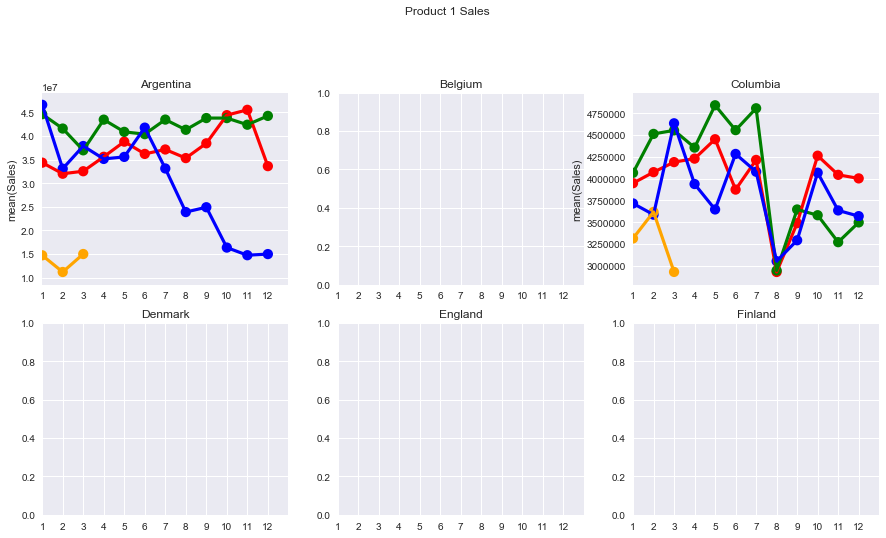

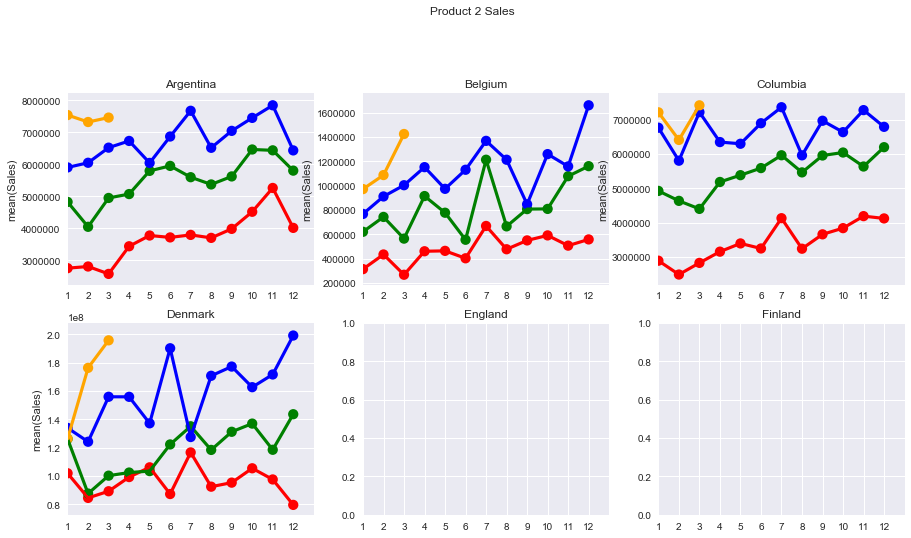

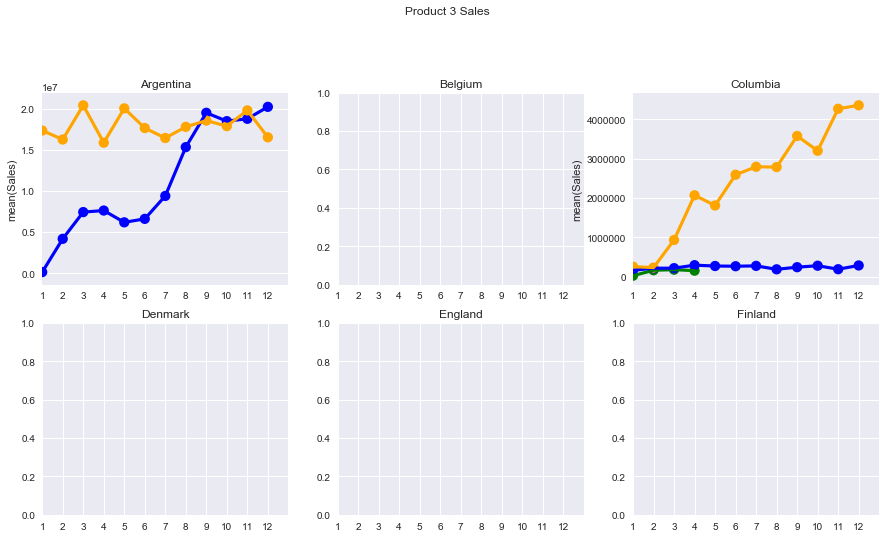

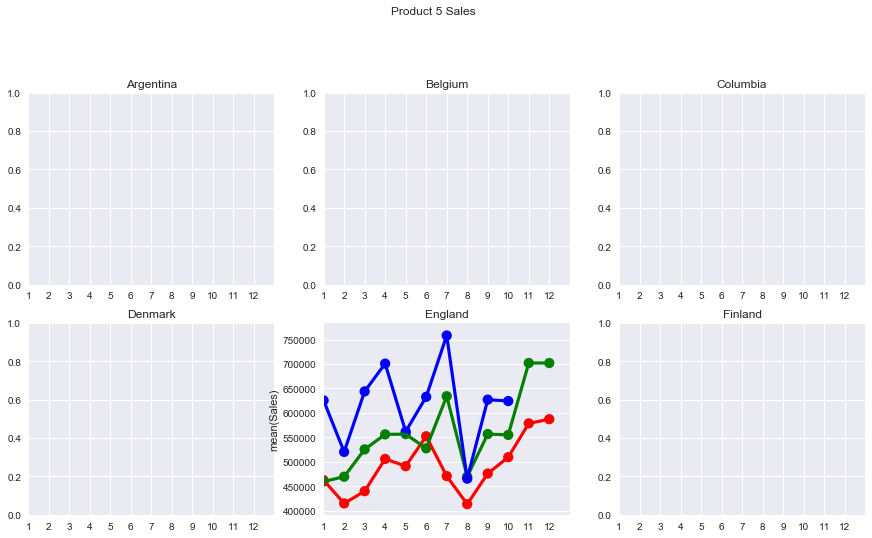

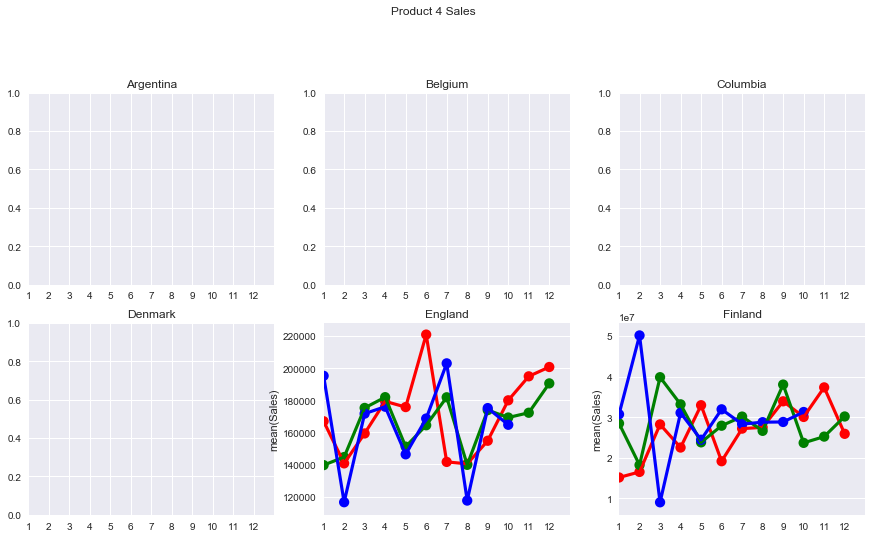

In [116]:
colors = ['red', 'green', 'blue', 'orange']
for product in train['Product_ID'].unique():
    plt.figure(figsize=(15,12))
    count = 0
    for country in countries:
        count = count+1
        plt.subplot(3,3,count)
        plt.title(country)
        if product in train[train['Country'] == country]['Product_ID'].unique():
            for year in train[train['Country'] == country][train['Product_ID'] == product]['Year'].unique():
                sns.pointplot(x = 'Month', y = 'Sales', color = colors[year-2013], data = plot_train.loc[(product,year, country)])

        plt.xlim([0,12])
        plt.xticks( np.arange(12),np.arange(1,13))
        plt.xlabel('')
        plt.suptitle('Product '+str(product)+' Sales')

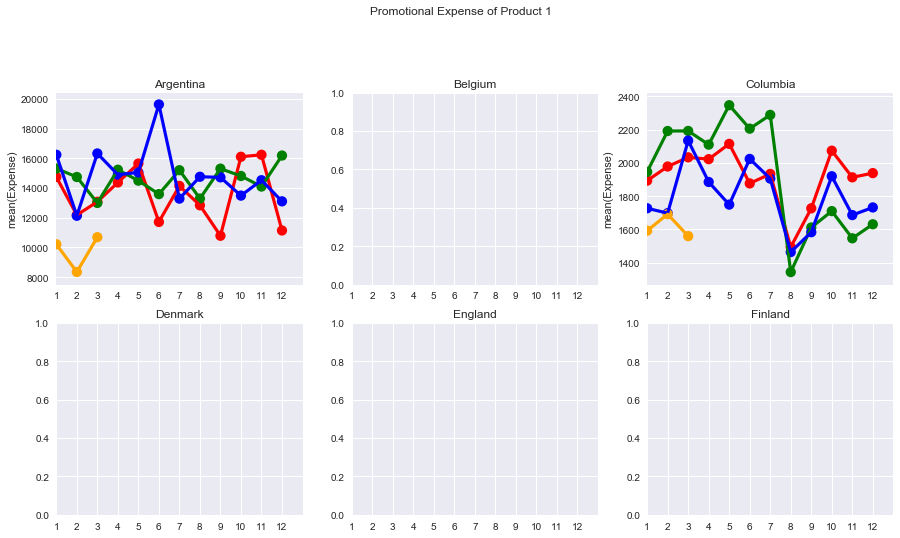

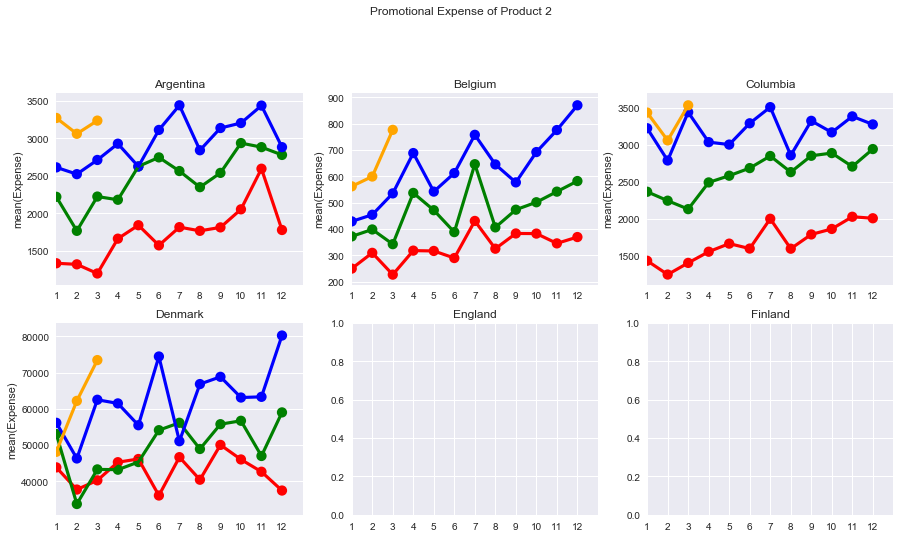

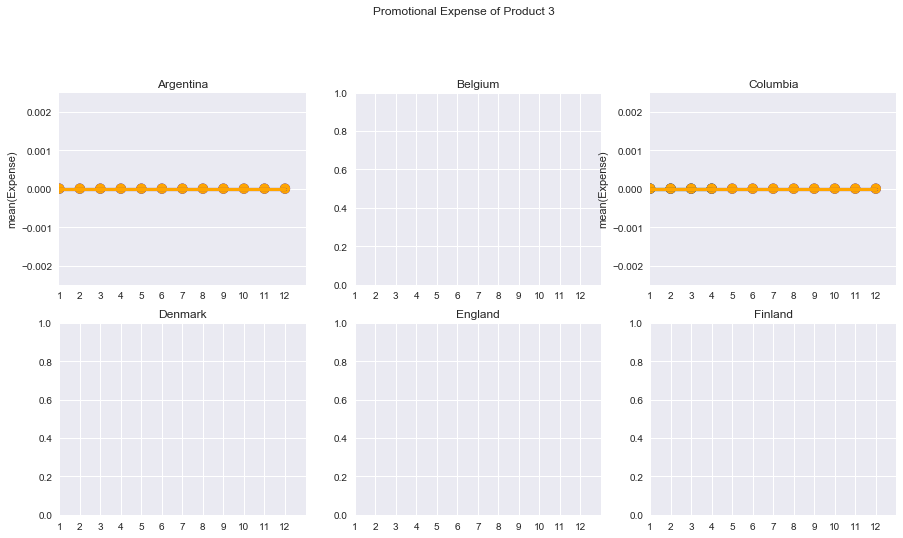

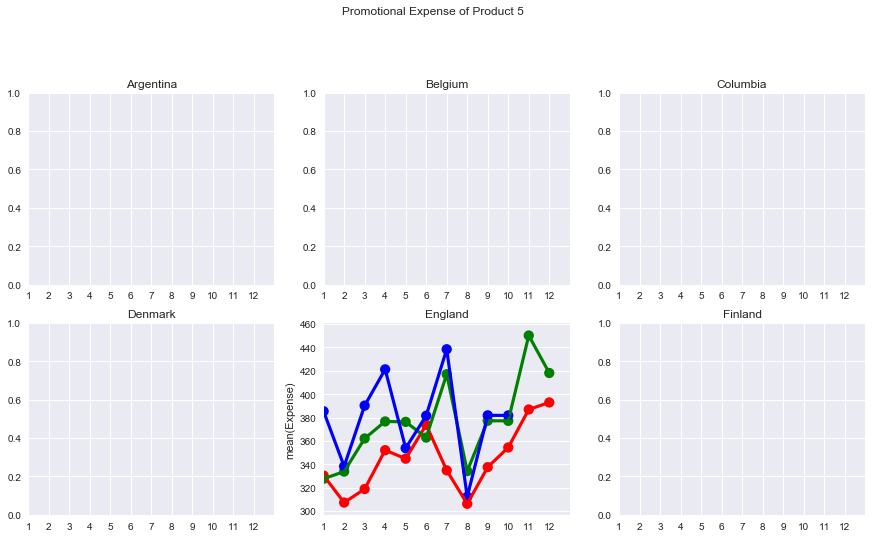

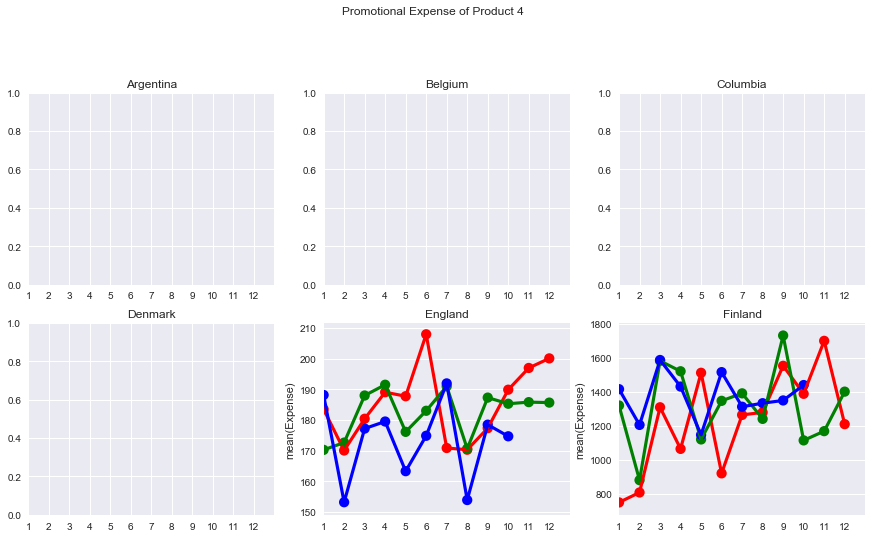

In [117]:
colors = ['red', 'green', 'blue', 'orange']
for product in train['Product_ID'].unique():
    plt.figure(figsize=(15,12))

    count = 0
    for country in countries:
        count = count+1
        plt.subplot(3,3,count)
        plt.title(country)
        if product in train[train['Country'] == country]['Product_ID'].unique():
            for year in train[train['Country'] == country][train['Product_ID'] == product]['Year'].unique():
                sns.pointplot(x = 'Month', y = 'Expense', color = colors[year-2013], data = plot_train.loc[(product,year, country)])

        plt.xlim([0,12])
        plt.xticks( np.arange(12),np.arange(1,13))
        plt.xlabel('')
        plt.suptitle('Promotional Expense of Product '+str(product))

** By looking at the sales and expense of Product 1 in Argentina, it would be better to not use a linear regressor to predict its sales. We will look at this case separately. There are a total of 12 predictions to be made for product 1 in Argentina. **

** I will make predictions for the 23 cases including those which were left out by the linear regression model using the above plots. **

## Product 1 Sales Argentina 

* Technically, all the predictions for Product 1 sales in Argentina were left out if (10, 1, 'Argentina') which gave a negative prediction is included. 
* We see a significant drop in sales of this product from the second half of 2015.
* Keeping the promotional expenses being the same as they were in the previous year did not help as the sales continued to drop.
* Looks like the company decided it was not worth spending so much and cut downn the expenses significantly. 
* The sales seem to have stabilised in the first quarter of 2016. 
* I will fill in the values for the remainder of 2016 and 2017 with the mean of this period as it does not seem very likely that the sales will increase as the promotional expenses have not increased.

In [118]:
plot_train.loc[(1, 2016, 'Argentina')]

Month       Sales    Expense
Product_ID Year Country                                
1          2016 Argentina      1  14740425.0  10215.226
                Argentina      2  11214000.0   8349.122
                Argentina      3  15016050.0  10691.996

In [119]:
prod_1_arg_pred = plot_train.loc[(1,2016, 'Argentina')]['Sales'].sum()/3
prod_1_arg_pred

13656825.0

In [120]:
test_pred.iloc[0:12]['Sales'] = [prod_1_arg_pred]*12
test_pred.iloc[0:12]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
0,79073,2016,4,1,Argentina,13656825.0,8214.875
1,79074,2016,5,1,Argentina,13656825.0,10777.878
2,79075,2016,6,1,Argentina,13656825.0,10320.673
3,79076,2016,7,1,Argentina,13656825.0,7377.587
4,79077,2016,8,1,Argentina,13656825.0,9805.705
5,79078,2016,9,1,Argentina,13656825.0,9375.481
6,79079,2016,10,1,Argentina,13656825.0,7284.900
7,79080,2016,11,1,Argentina,13656825.0,10381.438
8,79081,2016,12,1,Argentina,13656825.0,6865.382
9,79082,2017,1,1,Argentina,13656825.0,10704.394


## Product 3 Sales Argentina

* There was no promotional expense data provided for sales of product 3. Naturally there is no correlation between sales and expense.
* So all these predictions were not made by linear model.
* Argentina's sales for product 3 have been fairly consistent throughout the period of 2016. 
* I will take the average of sales in 2016 and fill it in 2017.

In [121]:
prod_3_arg_pred = plot_train.loc[(3, 2016, 'Argentina')]['Sales'].mean()
prod_3_arg_pred

17908143.75

In [122]:
test_pred.iloc[24:27]['Sales'] = [prod_3_arg_pred]*3
test_pred.iloc[24:27]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
24,79097,2017,1,3,Argentina,17908143.75,0.0
25,79098,2017,2,3,Argentina,17908143.75,0.0
26,79099,2017,3,3,Argentina,17908143.75,0.0


## Product 1 Sales : Columbia

* When we look at the sales in months 8 and 9 over the previous 3 years, they have been fairly constant (looking at each month). The expenses too follow the same trend.
* The expense of the cuurent year is almost as much as the previous years.
* So I will take the average sales in month 8 over the previous years and fill it in for 2016 and similarly with month 9.
* But we have already done this. All the predictions which weren't made by linear model followed this process. 
* So, nothing needs to be changed in the predictions.

## Product 3 Sales : Columbia

* The sales shot up significantly in 2016. 
* It is hard to predict how the sales will go in 2017 but given that there is no sudden spike and that the sales increased gradually we can say that the sales will not drop in 2017.
* I will use a linear model which predicts the Sales with respect to time.

In [123]:
test_pred.iloc[63:66]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
63,79136,2017,1,3,Columbia,206293.35,0.0
64,79137,2017,2,3,Columbia,220712.45,0.0
65,79138,2017,3,3,Columbia,572581.00,0.0


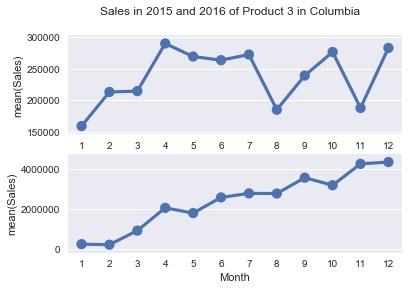

In [124]:
plt.subplot(2,1,1)
sns.pointplot(x = 'Month', y = 'Sales', data = plot_train.loc[(3, 2015, 'Columbia')])
plt.subplot(2,1,2)
sns.pointplot(x = 'Month', y = 'Sales', data = plot_train.loc[(3, 2016, 'Columbia')])
plt.suptitle('Sales in 2015 and 2016 of Product 3 in Columbia')

In [125]:
sales_2016 = plot_train.loc[(3, 2016, 'Columbia')]['Sales']

In [126]:
train_y = sales_2016.values
train_x = np.array(list(range(1,13)))
test_x = np.array([13,14,15]).reshape(-1,1)

model.fit(train_x.reshape(-1,1), train_y)
prod_3_col_pred = model.predict(test_x)

In [127]:
test_pred.iloc[63:66]['Sales'] = prod_3_col_pred

## The Rest

* Product 5 in England. Even though there was a decrease in expense in 2016 from 2015, the sales were same indicating the product is going good. This time the expenses have rised so expecting an increase in sales. The sales of a product have never gone below the sales in that month the previous. So, I will predict it to be much higher than in 2015 since the expenses have gone up.
* Product 4 in England. Safe to approximate it to the sales in 2015.
* Product 4 in Finland. The sales swung wildly in the beginning of 2015 even though the expense was the same as in 2014 and later stabilised to the 2013 level. So would predict it to be the value in 2013.

In [128]:
test_pred.loc[100, 'Sales'] = (plot_train.loc[(4, 2013, 'Finland')].iloc[2]['Sales'] + plot_train.loc[(4, 2014, 'Finland')].iloc[2]['Sales'])/2
test_pred.iloc[99:101]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
99,79172,2016,2,4,Finland,2.601819e+07,940.191
100,79173,2016,3,4,Finland,3.402799e+07,1439.734


In [129]:
test_pred.loc[91, 'Sales'] = plot_train.loc[(4, 2013, 'England')].iloc[2]['Sales']
test_pred.iloc[90:93]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
90,79163,2016,2,4,England,131442.936738,163.553
91,79164,2016,3,4,England,159316.900000,174.685
92,79165,2016,4,4,England,172478.005005,172.181


Sales and Expense of Product 5 in England:

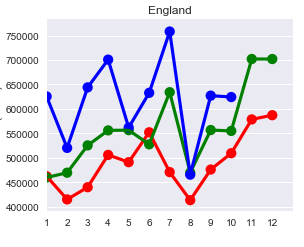 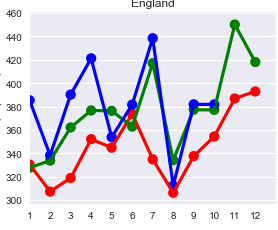

It is interesting to see that the trends of expense and sales are very very similar.

In [130]:
test_pred.loc[84, 'Sales'] = plot_train.loc[(5,2014,'England')].iloc[4]['Sales'] + (plot_train.loc[(5,2015,'England')].iloc[8]['Sales'] - plot_train.loc[(5,2014,'England')].iloc[8]['Sales'])*2
test_pred.iloc[81:86]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
81,79154,2016,2,5,England,487937.335165,333.141
82,79155,2016,3,5,England,733564.242804,427.817
83,79156,2016,4,5,England,633051.542358,399.159
84,79157,2016,5,5,England,697255.370000,400.744
85,79158,2016,6,5,England,860492.495959,426.198


In [131]:
test_pred.iloc[78:87]

,S_No,Year,Month,Product_ID,Country,Sales,Expense
78,79151,2015,11,5,England,637259.364492,416.969
79,79152,2015,12,5,England,912738.967406,464.351
80,79153,2016,1,5,England,521415.466463,349.703
81,79154,2016,2,5,England,487937.335165,333.141
82,79155,2016,3,5,England,733564.242804,427.817
83,79156,2016,4,5,England,633051.542358,399.159
84,79157,2016,5,5,England,697255.370000,400.744
85,79158,2016,6,5,England,860492.495959,426.198
86,79159,2016,7,5,England,575369.197228,378.903


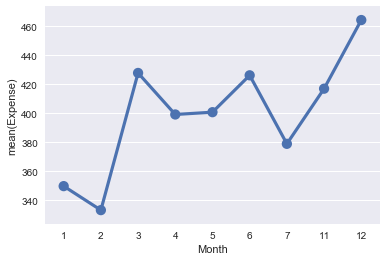

In [132]:
sns.pointplot(x = 'Month', y = 'Expense', data = test_pred.iloc[78:87])

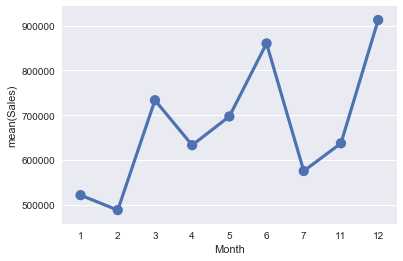

In [133]:
sns.pointplot(x = 'Month', y = 'Sales', data = test_pred.iloc[78:87])

Our model preserves the property of the trends of Sales and Expense being very similar.

In [134]:
submit3 = test_pred[test_pred.columns[:-1]]
submit3

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,1.365682e+07
1,79074,2016,5,1,Argentina,1.365682e+07
2,79075,2016,6,1,Argentina,1.365682e+07
3,79076,2016,7,1,Argentina,1.365682e+07
4,79077,2016,8,1,Argentina,1.365682e+07
5,79078,2016,9,1,Argentina,1.365682e+07
6,79079,2016,10,1,Argentina,1.365682e+07
7,79080,2016,11,1,Argentina,1.365682e+07
8,79081,2016,12,1,Argentina,1.365682e+07
9,79082,2017,1,1,Argentina,1.365682e+07


In [135]:
submit3.to_csv('yds_submission2018.csv', index = False)

** Public Leaderboard Score : 1.75416 **